In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# Function to load data
def load_data(filepath):
    """ Load a dataset from a specified file path. """
    data = pd.read_csv(filepath)
    print(f"Loaded data with {data.shape[0]} rows and {data.shape[1]} columns")
    return data

In [3]:
# Function to display data information
def display_data_info(df):
    """ Display basic information and the first 10 rows of the DataFrame. """
    print(df.info())
    print("First 5 rows of the dataset:")
    print(df.head(5))

In [4]:
# Function to plot distribution of the target variable
def plot_target_distribution(df, target):
    """ Plot the distribution of the target variable. """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target], kde=True)
    plt.title('Distribution of ' + target)
    plt.xlabel(target)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# Function to plot missing data
def plot_missing_data(df):
    """ Plot missing data counts for each feature. """
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
    plt.title('Missing data count by feature')
    plt.show()

In [6]:
# Function to plot correlation matrix
def plot_correlation_matrix(df, features):
    """ Plot the correlation matrix for selected features. """
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [7]:
# Function to create preprocessor for numeric and categorical data
def create_preprocessor(numeric_features, categorical_features):
    """ Create a column transformer for preprocessing the data. """
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    return ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
# Function to select features based on correlation and missing data
def select_features(df, target='SalePrice', corr_threshold=0.5, missing_threshold=0.2):
    """ Select features based on correlation with target and missing data percentage. """
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    high_corr_features = corr_matrix[target][corr_matrix[target].abs() > corr_threshold].index.tolist()
    missing_data = df.isnull().mean()
    low_missing_features = missing_data[missing_data < missing_threshold].index.tolist()
    selected_features = list(set(high_corr_features) & set(low_missing_features))
    if target in selected_features:
        selected_features.remove(target)
    return selected_features

In [9]:
# Function to train a Gradient Boosting model and return it
def train_model(X_train, y_train):
    """ Train a Gradient Boosting Regressor model. """
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

In [10]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train):
    """ Evaluate the model using RMSE, R-squared, and MAE. """
    predictions = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, predictions))
    r2 = r2_score(y_train, predictions)
    mae = mean_absolute_error(y_train, predictions)
    print(f"Model Performance: RMSE = {rmse}, R^2 = {r2}, MAE = {mae}")

Loaded data with 1460 rows and 81 columns
Loaded data with 1459 rows and 80 columns
Loaded data with 1459 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       

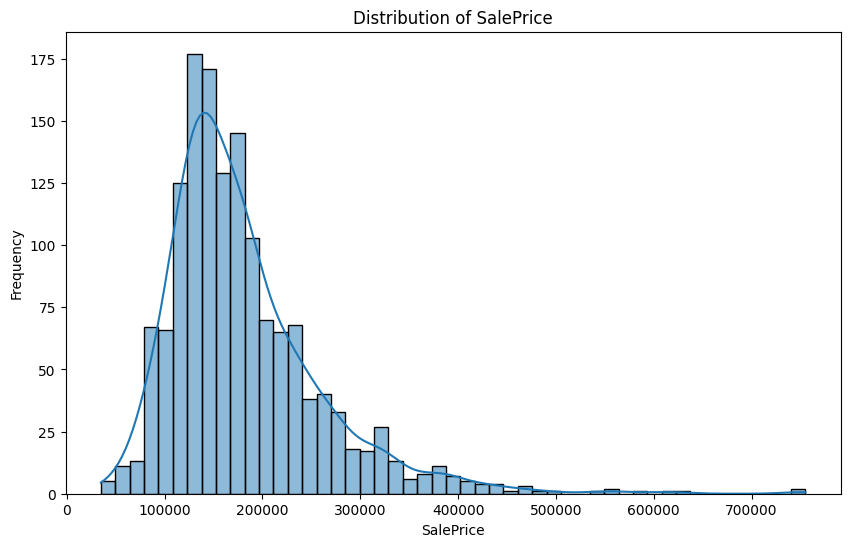

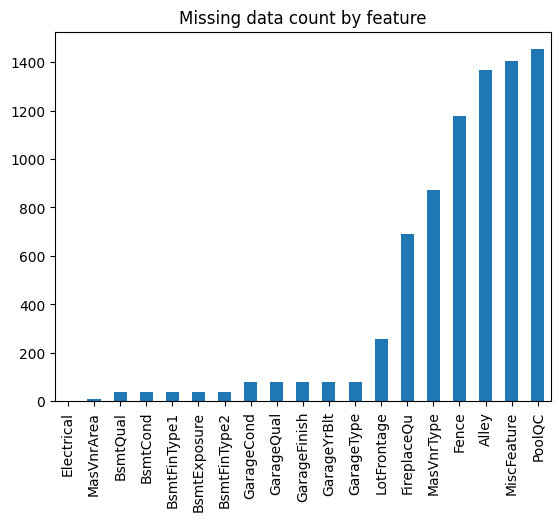

Selected features based on correlation and missing data: ['OverallQual', 'TotalBsmtSF', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'GarageCars', 'YearBuilt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd']


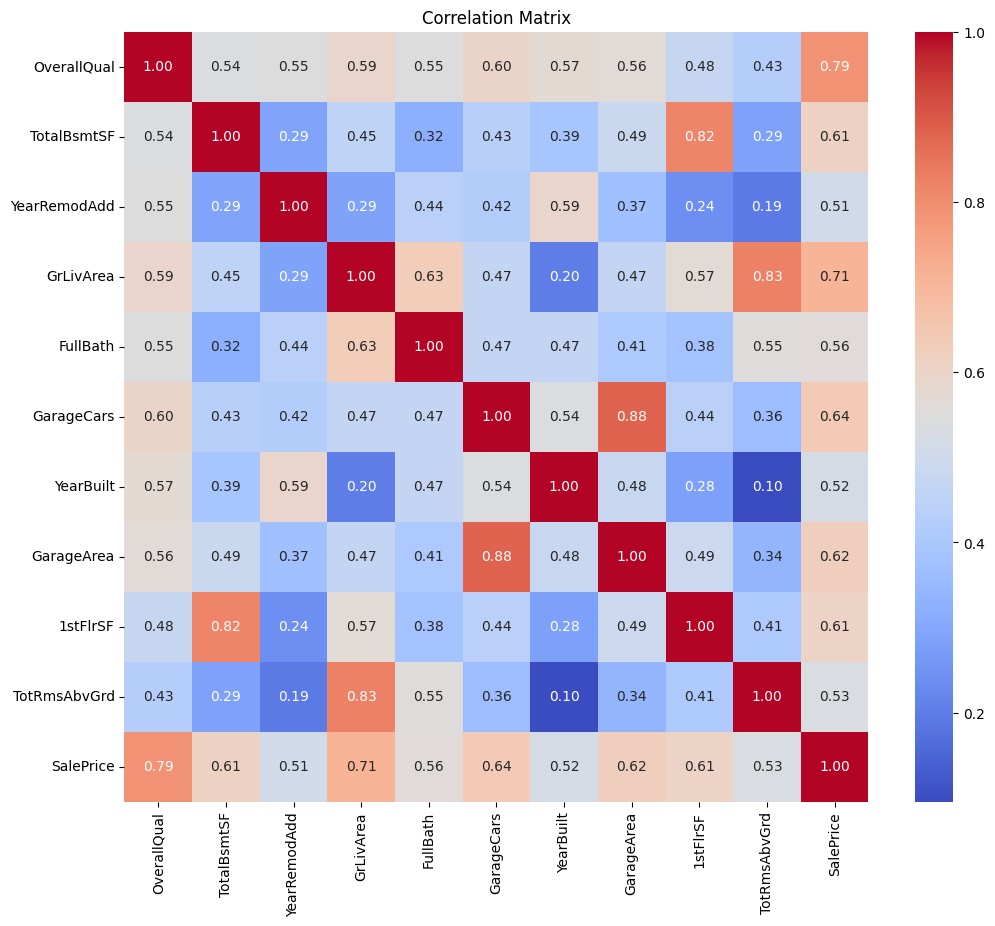

Model Performance: RMSE = 20669.286703093752, R^2 = 0.9322603878292162, MAE = 14731.311831859313
Submission file has been created at /content/drive/MyDrive/submission.csv
     Id      SalePrice
0  1461  121560.800704
1  1462  143170.998257
2  1463  161933.710377
3  1464  178107.744601
4  1465  205933.860946


In [18]:
# Main function to run the analysis
def main():
    # Paths to the dataset
    train_path = '/content/drive/MyDrive/DS/train.csv'
    test_path = '/content/drive/MyDrive/DS/test.csv'
    sample_submission_path = '/content/drive/MyDrive/DS/sample_submission.csv'

    # Load datasets
    train = load_data(train_path)
    test = load_data(test_path)
    sample_submission_df = load_data(sample_submission_path)

    # Display data information
    display_data_info(train)

    # Plotting the distribution of 'SalePrice'
    plot_target_distribution(train, 'SalePrice')

    # Plotting missing data
    plot_missing_data(train)

    # Feature selection
    features = select_features(train)
    print("Selected features based on correlation and missing data:", features)

    # Plot correlation matrix for selected features
    plot_correlation_matrix(train, features + ['SalePrice'])

    # Preprocessing
    numeric_features = train[features].select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = train[features].select_dtypes(include=['object']).columns.tolist()
    preprocessor = create_preprocessor(numeric_features, categorical_features)

    # Preparing the data
    X_train = preprocessor.fit_transform(train[features])
    y_train = train['SalePrice']
    X_test = preprocessor.transform(test[features])

    # Model training and evaluation
    model = train_model(X_train, y_train)
    evaluate_model(model, X_train, y_train)

    # Making predictions and preparing the submission file
    sample_submission_df['SalePrice'] = model.predict(X_test)
    submission_file_path = '/content/drive/MyDrive/submission.csv'
    sample_submission_df.to_csv(submission_file_path, index=False)
    print(f"Submission file has been created at {submission_file_path}")
    print(sample_submission_df.head())

if __name__ == "__main__":
    main()


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
